# Random Forest

In [ ]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import graphviz

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.model_selection import train_test_split  # Correção aqui
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import KNNImputer

# Visualisation
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Encoders
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Install

In [2]:
#!pip install graphviz

# First 

3% of the merged dataset

In [2]:
df = pd.read_csv('..\documents\generated\df_inicial_3%.csv', low_memory=False)
display(df)

,subject_id,charttime_chartevent,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,...,race,admission_location,age,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,priority,admittime,time_since_admission_labevent
0,10036156,2157-07-02 04:00:00,92,92.0,%,O2 Saturation Pulseoxymetry Alarm - Low,Alarms,23.133333,2724,URGENT,...,UNKNOWN,TRANSFER FROM HOSPITAL,88,2157-07-02 04:07:00,12,12.0,mEq/L,ROUTINE,2157-07-01 04:52:00,23.250000
1,10011398,2146-12-16 05:00:00,Sharp,NaN,Unknown,Pain Type,Pain/Sedation,21.750000,2724,SURGICAL SAME DAY ADMISSION,...,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,2146-12-16 02:21:00,3.2,3.2,mg/dL,STAT,2146-12-15 07:15:00,19.100000
2,10018845,2184-10-08 04:38:00,Normal for Race,NaN,Unknown,Skin Color,Skin - Assessment,2.166667,2724,EW EMER.,...,WHITE,EMERGENCY ROOM,91,2184-10-08 20:37:00,NaN,NaN,Unknown,STAT,2184-10-08 02:28:00,18.150000
3,10018081,2133-12-19 12:26:00,Swab,NaN,Unknown,Oral Care,Treatments,19.466667,2724,EW EMER.,...,WHITE,EMERGENCY ROOM,79,2133-12-18 17:28:00,5.1,5.1,mg/dL,ROUTINE,2133-12-18 16:58:00,0.500000
4,10018081,2133-12-19 06:00:00,2 rails up,NaN,Unknown,Side Rails,Restraint/Support Systems,13.033333,2724,EW EMER.,...,WHITE,EMERGENCY ROOM,79,2133-12-18 17:28:00,13.9,13.9,%,ROUTINE,2133-12-18 16:58:00,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358190,10019003,2153-03-28 19:00:00,97,97.0,%,O2 saturation pulseoxymetry,Respiratory,19.583333,Z87891,EW EMER.,...,WHITE,EMERGENCY ROOM,70,2153-03-28 14:04:00,30,30.0,mg/dL,ROUTINE,2153-03-27 23:25:00,14.650000
358191,10023117,2175-07-07 00:00:00,Regular,NaN,Unknown,Breathing pattern/effort,Pulmonary,8.050000,Z87891,OBSERVATION ADMIT,...,WHITE,EMERGENCY ROOM,58,2175-07-06 18:37:00,1.9,1.9,mg/dL,STAT,2175-07-06 15:57:00,2.666667
358192,10023117,2175-03-21 16:00:00,Obeys Commands,6.0,Unknown,GCS - Motor Response,Neurological,16.516667,Z87891,OBSERVATION ADMIT,...,WHITE,TRANSFER FROM HOSPITAL,58,2175-03-21 09:03:00,NaN,NaN,mg/dL,ROUTINE,2175-03-20 23:29:00,9.566667
358193,10023117,2175-03-21 07:17:00,35,35.0,mmHg,Pulmonary Artery Pressure Alarm - High,Alarms,7.800000,Z87891,OBSERVATION ADMIT,...,WHITE,TRANSFER FROM HOSPITAL,58,2175-03-21 09:03:00,NaN,NaN,Unknown,ROUTINE,2175-03-20 23:29:00,9.566667


In [3]:
# drop of tables
df = df.drop(columns=['subject_id','charttime_chartevent', 'charttime_labevent', 'admittime'])

In [4]:
display(df)

,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,insurance,race,admission_location,age,value_labevent,valuenum_labevent,valueuom_labevent,priority,time_since_admission_labevent
0,92,92.0,%,O2 Saturation Pulseoxymetry Alarm - Low,Alarms,23.133333,2724,URGENT,Other,UNKNOWN,TRANSFER FROM HOSPITAL,88,12,12.0,mEq/L,ROUTINE,23.250000
1,Sharp,NaN,Unknown,Pain Type,Pain/Sedation,21.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,3.2,3.2,mg/dL,STAT,19.100000
2,Normal for Race,NaN,Unknown,Skin Color,Skin - Assessment,2.166667,2724,EW EMER.,Other,WHITE,EMERGENCY ROOM,91,NaN,NaN,Unknown,STAT,18.150000
3,Swab,NaN,Unknown,Oral Care,Treatments,19.466667,2724,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,79,5.1,5.1,mg/dL,ROUTINE,0.500000
4,2 rails up,NaN,Unknown,Side Rails,Restraint/Support Systems,13.033333,2724,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,79,13.9,13.9,%,ROUTINE,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358190,97,97.0,%,O2 saturation pulseoxymetry,Respiratory,19.583333,Z87891,EW EMER.,Other,WHITE,EMERGENCY ROOM,70,30,30.0,mg/dL,ROUTINE,14.650000
358191,Regular,NaN,Unknown,Breathing pattern/effort,Pulmonary,8.050000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,EMERGENCY ROOM,58,1.9,1.9,mg/dL,STAT,2.666667
358192,Obeys Commands,6.0,Unknown,GCS - Motor Response,Neurological,16.516667,Z87891,OBSERVATION ADMIT,Medicare,WHITE,TRANSFER FROM HOSPITAL,58,NaN,NaN,mg/dL,ROUTINE,9.566667
358193,35,35.0,mmHg,Pulmonary Artery Pressure Alarm - High,Alarms,7.800000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,TRANSFER FROM HOSPITAL,58,NaN,NaN,Unknown,ROUTINE,9.566667


# Imbalanced Data First Try

Here, the top 6 diseases don’t have the same number of designated lines

I took 8% of the first dataset to reduce the number of lines that will train the dataset, acording to the icd_codes

In [6]:
df_sample = df.groupby('icd_code', group_keys=False).sample(frac=0.08, random_state=42)
display(df_sample)

,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,insurance,race,admission_location,age,value_labevent,valuenum_labevent,valueuom_labevent,priority,time_since_admission_labevent
67370,Grade 0,NaN,Unknown,20 G Infiltration Scale,Access Lines - Peripheral,16.350000,2724,DIRECT EMER.,Other,WHITE,CLINIC REFERRAL,67,11.4,11.4,g/dL,STAT,15.783333
42599,Children,NaN,Unknown,Support Systems,Restraint/Support Systems,16.266667,2724,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,79,32.9,32.9,pg,ROUTINE,0.500000
62299,Unknown,NaN,Unknown,Restraint Location,Restraint/Support Systems,7.066667,2724,SURGICAL SAME DAY ADMISSION,Medicare,OTHER,PHYSICIAN REFERRAL,66,0,0.0,mEq/L,Unknown,4.000000
10137,24,24.0,insp/min,Respiratory Rate,Respiratory,7.033333,2724,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,79,136,136.0,mEq/L,STAT,8.750000
30998,Brisk,NaN,Unknown,Pupil Response Right,Neurological,21.550000,2724,URGENT,Other,WHITE,TRANSFER FROM HOSPITAL,56,110,110.0,IU/L,STAT,11.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344457,Clear,NaN,Unknown,RUL Lung Sounds,Pulmonary,18.200000,Z87891,EW EMER.,Other,WHITE,TRANSFER FROM HOSPITAL,72,7.5,7.5,units,STAT,15.550000
349032,Easily Palpable,NaN,Unknown,Dorsal PedPulse L,Cardiovascular (Pulses),12.600000,Z87891,EW EMER.,Other,WHITE,PHYSICIAN REFERRAL,59,7.2,7.2,g/dL,ROUTINE,22.883333
316548,410,410.0,mL,Tidal Volume (spontaneous),Respiratory,15.433333,Z87891,EW EMER.,Medicare,UNKNOWN,EMERGENCY ROOM,79,NaN,NaN,Unknown,STAT,12.300000
355089,0,0.0,Unknown,18 Gauge placed in the field,Access Lines - Peripheral,1.266667,Z87891,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,89,94,94.0,mEq/L,ROUTINE,10.083333


In [7]:
print("original distribution:")
print(df_sample['icd_code'].value_counts(normalize=True).head())

print("\n now distribution:")
print(df_sample['icd_code'].value_counts(normalize=True).head())

original distribution:
icd_code
4019      0.268460
2724      0.215662
E785      0.182719
E039      0.144263
Z87891    0.135853
Name: proportion, dtype: float64

 now distribution:
icd_code
4019      0.268460
2724      0.215662
E785      0.182719
E039      0.144263
Z87891    0.135853
Name: proportion, dtype: float64


In [8]:
print(df_sample.columns)

Index(['value_chartevent', 'valuenum_chartevent', 'valueuom_chartevent',
       'label_chartevent', 'category', 'time_since_admission_chartevent',
       'icd_code', 'admission_type', 'insurance', 'race', 'admission_location',
       'age', 'value_labevent', 'valuenum_labevent', 'valueuom_labevent',
       'priority', 'time_since_admission_labevent'],
      dtype='object')


In [9]:
df_sample.dtypes

value_chartevent                    object
valuenum_chartevent                float64
valueuom_chartevent                 object
label_chartevent                    object
category                            object
time_since_admission_chartevent    float64
icd_code                            object
admission_type                      object
insurance                           object
race                                object
admission_location                  object
age                                  int64
value_labevent                      object
valuenum_labevent                  float64
valueuom_labevent                   object
priority                            object
time_since_admission_labevent      float64
dtype: object

In [10]:
df_sample.select_dtypes(include='object').nunique()

value_chartevent       1659
valueuom_chartevent      30
label_chartevent        778
category                 25
icd_code                  6
admission_type            6
insurance                 3
race                      9
admission_location        7
value_labevent         1052
valueuom_labevent        31
priority                  3
dtype: int64

# Variables Defenition and Treatment

In [25]:
# Strings with medium number of unique types -> Frequency
variables = [
   'value_chartevent', 'label_chartevent', 'valueuom_labevent', 'valueuom_chartevent'
]

# String with the higest number of unique types -> Frequency
lab = ['value_labevent']


# Strings with low number of unique types -> OneHotEncoding
variables_cat = ['admission_type', 'insurance', 'priority', 'race', 'admission_location', 'category']

# Numerical
numerical_cols = [
    'valuenum_chartevent', 'valuenum_labevent',
    'time_since_admission_chartevent', 'time_since_admission_labevent', 'age'
]

# Target (icd_code)
target = 'icd_code'


In [26]:
X_raw = df_sample[variables + numerical_cols + variables_cat + lab].copy()
y = df_sample[target].copy()

## String Features

value_chartevent, valueuom_chartevent, label_chartevent, category, admission_type, insurance, race, admission_location, priority



In [27]:
# First the icd-code is an categorical object -> LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

y = y_encoded

## One-Hot Encoding

In [28]:

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot_encoded = encoder.fit_transform(X_raw[variables_cat])

one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(variables_cat),
                          index=X_raw.index)

X_encoded = pd.concat([X_raw.drop(columns=variables_cat), one_hot_df], axis=1)


In [29]:
display(X_encoded)

,value_chartevent,label_chartevent,valueuom_labevent,valueuom_chartevent,valuenum_chartevent,valuenum_labevent,time_since_admission_chartevent,time_since_admission_labevent,age,value_labevent,...,category_Pain/Sedation,category_Pulmonary,category_Respiratory,category_Restraint/Support Systems,category_Routine Vital Signs,category_Skin - Assessment,category_Skin - Impairment,category_Skin - Incisions,category_Toxicology,category_Treatments
67370,Grade 0,20 G Infiltration Scale,g/dL,Unknown,NaN,11.4,16.350000,15.783333,67,11.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42599,Children,Support Systems,pg,Unknown,NaN,32.9,16.266667,0.500000,79,32.9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
62299,Unknown,Restraint Location,mEq/L,Unknown,NaN,0.0,7.066667,4.000000,66,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10137,24,Respiratory Rate,mEq/L,insp/min,24.0,136.0,7.033333,8.750000,79,136,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30998,Brisk,Pupil Response Right,IU/L,Unknown,NaN,110.0,21.550000,11.483333,56,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344457,Clear,RUL Lung Sounds,units,Unknown,NaN,7.5,18.200000,15.550000,72,7.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349032,Easily Palpable,Dorsal PedPulse L,g/dL,Unknown,NaN,7.2,12.600000,22.883333,59,7.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316548,410,Tidal Volume (spontaneous),Unknown,mL,410.0,NaN,15.433333,12.300000,79,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
355089,0,18 Gauge placed in the field,mEq/L,Unknown,0.0,94.0,1.266667,10.083333,89,94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Frequency Encoding

In [30]:
for col in variables:
    freq = X_encoded[col].value_counts()
    X_encoded[col + '_freq'] = X_encoded[col].map(freq)

# Remove original high unique values columns
X_encoded.drop(columns=variables, inplace=True)

# missing values indicator

for col in numerical_cols:
    X_encoded[col + '_missing'] = X_encoded[col].isna().astype(int)

# Preencher os NaNs com um valor neutro (-999)
X_encoded[numerical_cols] = X_encoded[numerical_cols].fillna(-999)

display(X_encoded)

,valuenum_chartevent,valuenum_labevent,time_since_admission_chartevent,time_since_admission_labevent,age,value_labevent,admission_type_DIRECT EMER.,admission_type_ELECTIVE,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,...,category_Treatments,value_chartevent_freq,label_chartevent_freq,valueuom_labevent_freq,valueuom_chartevent_freq,valuenum_chartevent_missing,valuenum_labevent_missing,time_since_admission_chartevent_missing,time_since_admission_labevent_missing,age_missing
67370,-999.0,11.4,16.350000,15.783333,67,11.4,1.0,0.0,0.0,0.0,...,0.0,289,95,1165,20661,1,0,0,0,0
42599,-999.0,32.9,16.266667,0.500000,79,32.9,0.0,0.0,1.0,0.0,...,0.0,18,82,607,20661,1,0,0,0,0
62299,-999.0,0.0,7.066667,4.000000,66,0,0.0,0.0,0.0,0.0,...,0.0,935,69,5386,20661,1,0,0,0,0
10137,24.0,136.0,7.033333,8.750000,79,136,0.0,0.0,1.0,0.0,...,0.0,63,666,5386,978,0,0,0,0,0
30998,-999.0,110.0,21.550000,11.483333,56,110,0.0,0.0,0.0,0.0,...,0.0,208,121,801,20661,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344457,-999.0,7.5,18.200000,15.550000,72,7.5,0.0,0.0,1.0,0.0,...,0.0,370,111,838,20661,1,0,0,0,0
349032,-999.0,7.2,12.600000,22.883333,59,7.2,0.0,0.0,1.0,0.0,...,0.0,307,115,1165,20661,1,0,0,0,0
316548,410.0,-999.0,15.433333,12.300000,79,NaN,0.0,0.0,1.0,0.0,...,0.0,3,10,4235,129,0,1,0,0,0
355089,0.0,94.0,1.266667,10.083333,89,94,0.0,0.0,1.0,0.0,...,0.0,831,57,5386,20661,0,0,0,0,0


In [31]:

X_encoded['value_labevent'] = X_encoded['value_labevent'].astype(str)

freq = X_encoded['value_labevent'].value_counts()
X_encoded['value_labevent_freq'] = X_encoded['value_labevent'].map(freq)

# Remove original
X_encoded.drop(columns=['value_labevent'], inplace=True)



In [32]:
display(X_encoded)

,valuenum_chartevent,valuenum_labevent,time_since_admission_chartevent,time_since_admission_labevent,age,admission_type_DIRECT EMER.,admission_type_ELECTIVE,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,...,value_chartevent_freq,label_chartevent_freq,valueuom_labevent_freq,valueuom_chartevent_freq,valuenum_chartevent_missing,valuenum_labevent_missing,time_since_admission_chartevent_missing,time_since_admission_labevent_missing,age_missing,value_labevent_freq
67370,-999.0,11.4,16.350000,15.783333,67,1.0,0.0,0.0,0.0,0.0,...,289,95,1165,20661,1,0,0,0,0,41
42599,-999.0,32.9,16.266667,0.500000,79,0.0,0.0,1.0,0.0,0.0,...,18,82,607,20661,1,0,0,0,0,35
62299,-999.0,0.0,7.066667,4.000000,66,0.0,0.0,0.0,0.0,1.0,...,935,69,5386,20661,1,0,0,0,0,550
10137,24.0,136.0,7.033333,8.750000,79,0.0,0.0,1.0,0.0,0.0,...,63,666,5386,978,0,0,0,0,0,99
30998,-999.0,110.0,21.550000,11.483333,56,0.0,0.0,0.0,0.0,0.0,...,208,121,801,20661,1,0,0,0,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344457,-999.0,7.5,18.200000,15.550000,72,0.0,0.0,1.0,0.0,0.0,...,370,111,838,20661,1,0,0,0,0,27
349032,-999.0,7.2,12.600000,22.883333,59,0.0,0.0,1.0,0.0,0.0,...,307,115,1165,20661,1,0,0,0,0,36
316548,410.0,-999.0,15.433333,12.300000,79,0.0,0.0,1.0,0.0,0.0,...,3,10,4235,129,0,1,0,0,0,2291
355089,0.0,94.0,1.266667,10.083333,89,0.0,0.0,1.0,0.0,0.0,...,831,57,5386,20661,0,0,0,0,0,60


In [33]:
X_encoded.to_csv("df_treated.csv", index=False)

# Random Forest Regressor Model     1st

In [34]:
X = X_encoded

# 0.2 of data test size
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
y_pred = rf.predict(X_test)

In [37]:
# com balanço
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6060711793440335


## Result Visualization

In [38]:


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1209
           1       0.72      0.74      0.73      1548
           2       0.60      0.60      0.60       835
           3       0.51      0.53      0.52      1036
           4       0.51      0.45      0.48       308
           5       0.48      0.48      0.48       796

    accuracy                           0.61      5732
   macro avg       0.58      0.57      0.57      5732
weighted avg       0.61      0.61      0.61      5732



In [39]:
# importance degree of the features (15 more important)

features = pd.DataFrame(rf.feature_importances_, index= X.columns)

features.head(15)

,0
valuenum_chartevent,0.030969
valuenum_labevent,0.058628
time_since_admission_chartevent,0.069427
time_since_admission_labevent,0.070249
age,0.136965
admission_type_DIRECT EMER.,0.003723
admission_type_ELECTIVE,0.007220
admission_type_EW EMER.,0.022044
admission_type_OBSERVATION ADMIT,0.024518
admission_type_SURGICAL SAME DAY ADMISSION,0.009633


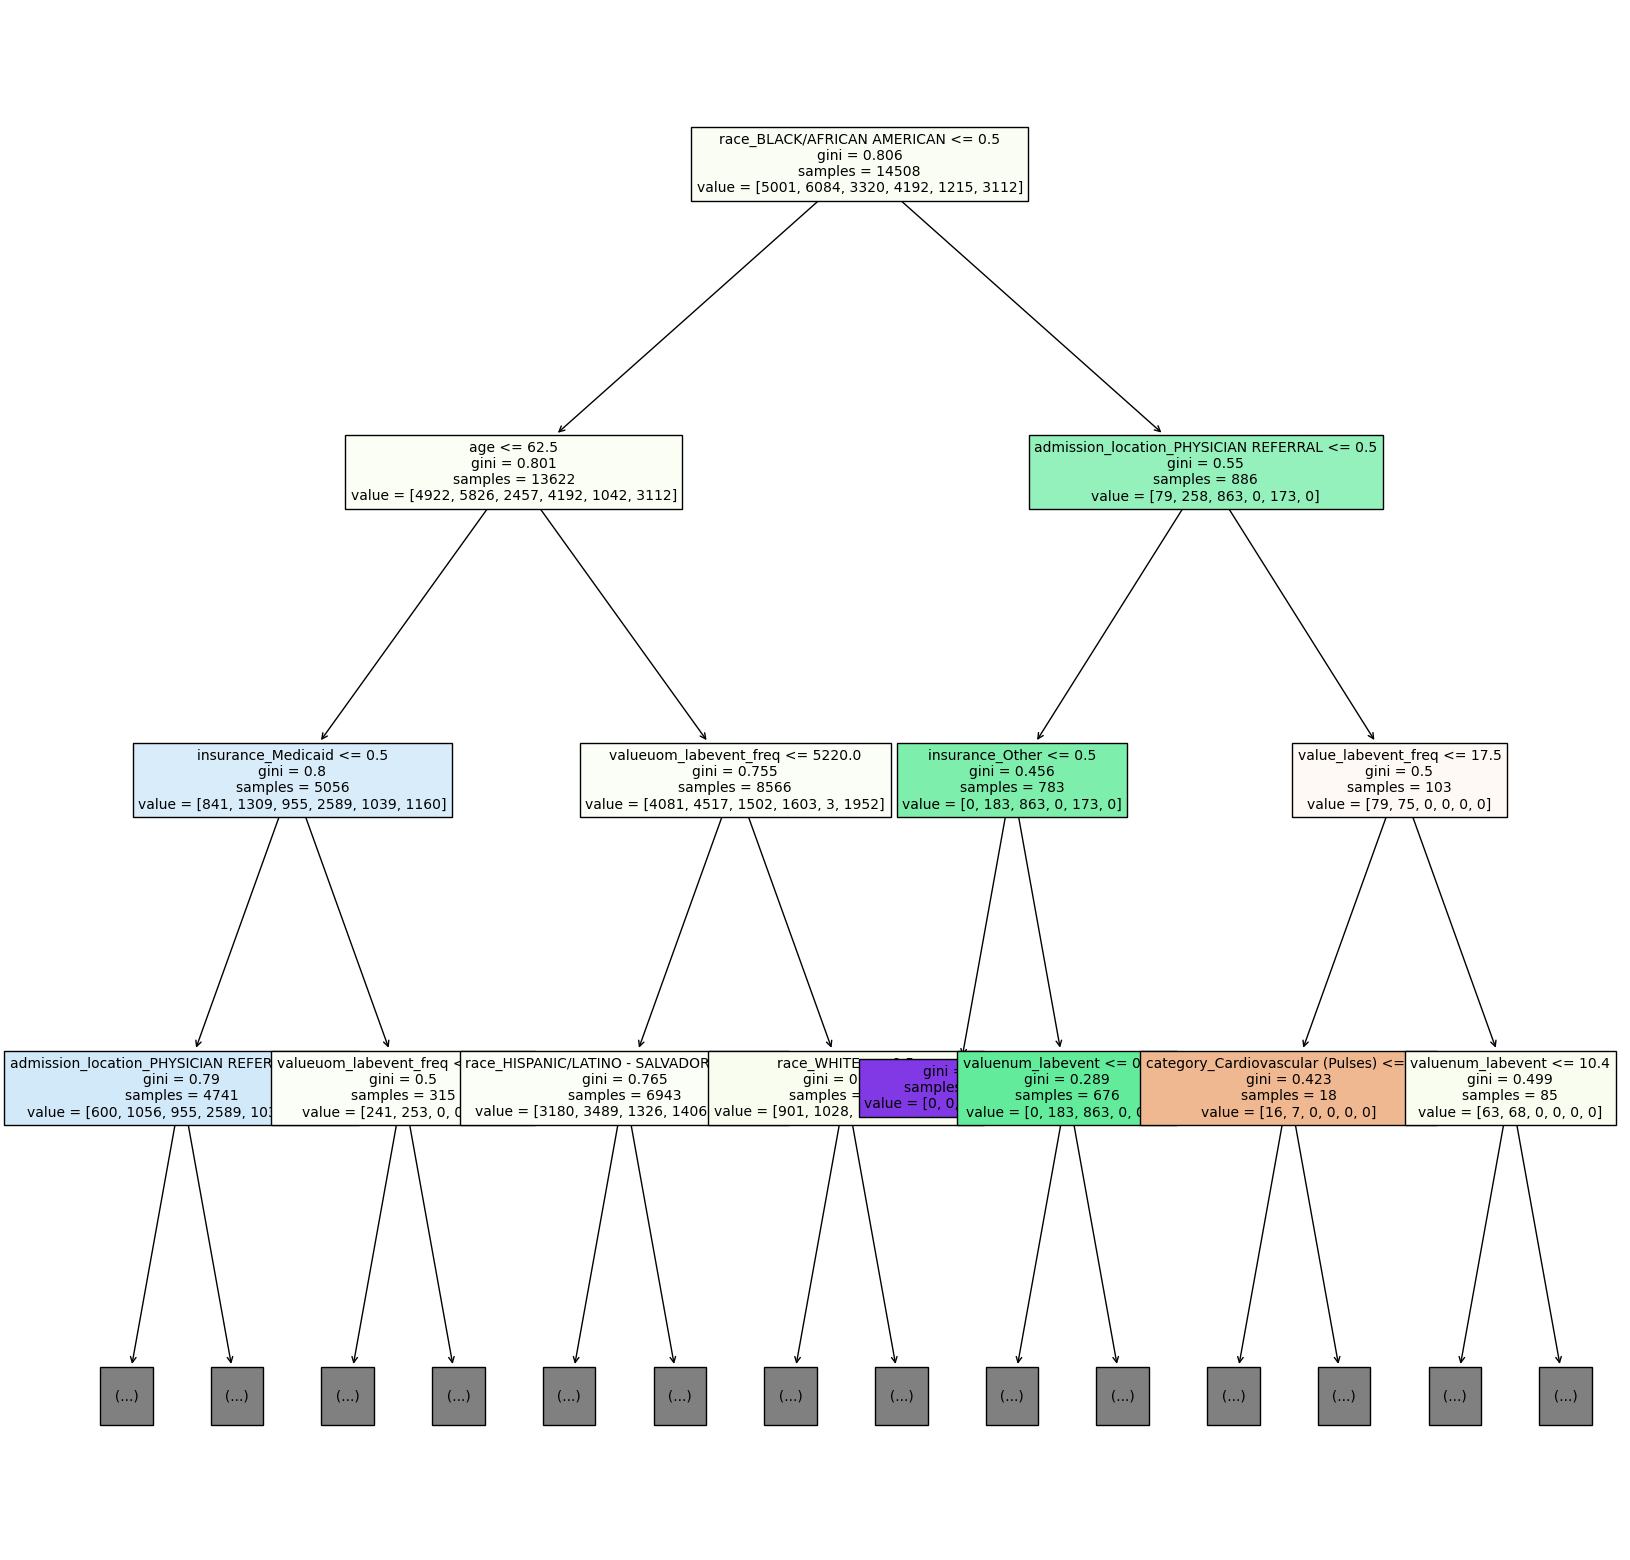

In [42]:
# depth of 3

plt.figure(figsize=(20,20))
plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True, max_depth=3, fontsize=10)
plt.show()

coisas para tratar como forma de melhorar o modelo:

tratar valores missing;

tratar de outliers;

### The gives the best max_depth and n_estimators for the model

Using a classifier to built a predictive analysis system

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001891573BB10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018913B66610>})

In [51]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 141}


# RF2 model

In [52]:
rf2 = RandomForestClassifier( n_estimators= 141, criterion= 'entropy',
min_samples_split = 10,
max_depth = 18,
random_state= 42

)

In [53]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=18, min_samples_split=10,
                       n_estimators=141, random_state=42)

In [54]:
rf2.score(X_test, y_test)

0.6045010467550593

In [55]:
y_pred2 = rf2.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.59      0.62      1209
           1       0.69      0.77      0.73      1548
           2       0.58      0.61      0.60       835
           3       0.52      0.54      0.53      1036
           4       0.51      0.43      0.47       308
           5       0.48      0.46      0.47       796

    accuracy                           0.60      5732
   macro avg       0.58      0.57      0.57      5732
weighted avg       0.60      0.60      0.60      5732



## Confusion Matrix

Accuracy: 0.6067690160502442
Precision: 0.6051062627428824
Recall: 0.6067690160502442
F1 Score: 0.6044553287579014


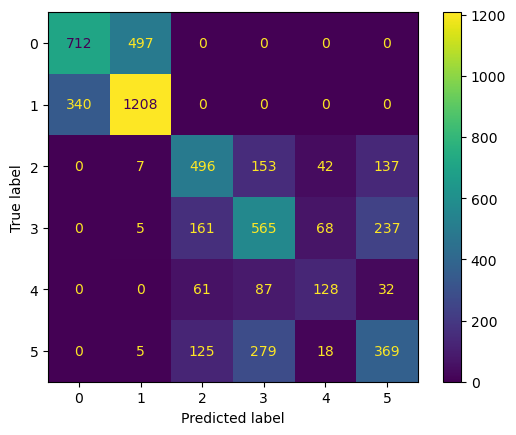

In [57]:


y_pred = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [58]:
# importance degree of the features (15 more important)

features = pd.DataFrame(rf2.feature_importances_, index= X.columns)

features.head(15)

,0
valuenum_chartevent,0.010658
valuenum_labevent,0.019662
time_since_admission_chartevent,0.025986
time_since_admission_labevent,0.064369
age,0.220705
admission_type_DIRECT EMER.,0.008146
admission_type_ELECTIVE,0.014661
admission_type_EW EMER.,0.042991
admission_type_OBSERVATION ADMIT,0.049482
admission_type_SURGICAL SAME DAY ADMISSION,0.017018


# Balanced data model

All icd_code will have the same number of lines

In [59]:

min_count = df['icd_code'].value_counts().min()
print(min_count)

19002


In [60]:
# 6200 for every sigle icd_code (6)
min_count = 6200

df_sample = df.groupby('icd_code', group_keys=False).sample(n=min_count, random_state=42)
display(df_sample)

,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,insurance,race,admission_location,age,value_labevent,valuenum_labevent,valueuom_labevent,priority,time_since_admission_labevent
67370,Grade 0,NaN,Unknown,20 G Infiltration Scale,Access Lines - Peripheral,16.350000,2724,DIRECT EMER.,Other,WHITE,CLINIC REFERRAL,67,11.4,11.4,g/dL,STAT,15.783333
42599,Children,NaN,Unknown,Support Systems,Restraint/Support Systems,16.266667,2724,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,79,32.9,32.9,pg,ROUTINE,0.500000
62299,Unknown,NaN,Unknown,Restraint Location,Restraint/Support Systems,7.066667,2724,SURGICAL SAME DAY ADMISSION,Medicare,OTHER,PHYSICIAN REFERRAL,66,0,0.0,mEq/L,Unknown,4.000000
10137,24,24.0,insp/min,Respiratory Rate,Respiratory,7.033333,2724,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,79,136,136.0,mEq/L,STAT,8.750000
30998,Brisk,NaN,Unknown,Pupil Response Right,Neurological,21.550000,2724,URGENT,Other,WHITE,TRANSFER FROM HOSPITAL,56,110,110.0,IU/L,STAT,11.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317418,Oral,NaN,Unknown,Temperature Site,Routine Vital Signs,10.583333,Z87891,EW EMER.,Other,WHITE,EMERGENCY ROOM,70,178,178.0,mg/dL,STAT,3.850000
325284,11,11.0,mmHg,Central Venous Pressure,Hemodynamics,15.700000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,TRANSFER FROM HOSPITAL,58,INTUBATED.,NaN,Unknown,Unknown,5.616667
324418,98,98.0,mmHg,Non Invasive Blood Pressure systolic,Routine Vital Signs,22.550000,Z87891,URGENT,Medicare,UNKNOWN,TRANSFER FROM HOSPITAL,81,12.5,12.5,%,ROUTINE,18.600000
350939,1,1.0,Unknown,Visual / hearing deficit,Adm History/FHPA,0.466667,Z87891,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,89,7.2,7.2,mg/dL,ROUTINE,10.083333


In [61]:
df_sample.to_csv("df_balanced.csv", index=False)

                                 Missing  Percent (%)
value_chartevent                       0     0.000000
valuenum_chartevent                20580    55.322581
valueuom_chartevent                    0     0.000000
label_chartevent                       0     0.000000
category                               0     0.000000
time_since_admission_chartevent        0     0.000000
icd_code                               0     0.000000
admission_type                         0     0.000000
insurance                              0     0.000000
race                                   0     0.000000
admission_location                     0     0.000000
age                                    0     0.000000
value_labevent                      2986     8.026882
valuenum_labevent                   4838    13.005376
valueuom_labevent                      0     0.000000
priority                               0     0.000000
time_since_admission_labevent          2     0.005376


<Axes: >

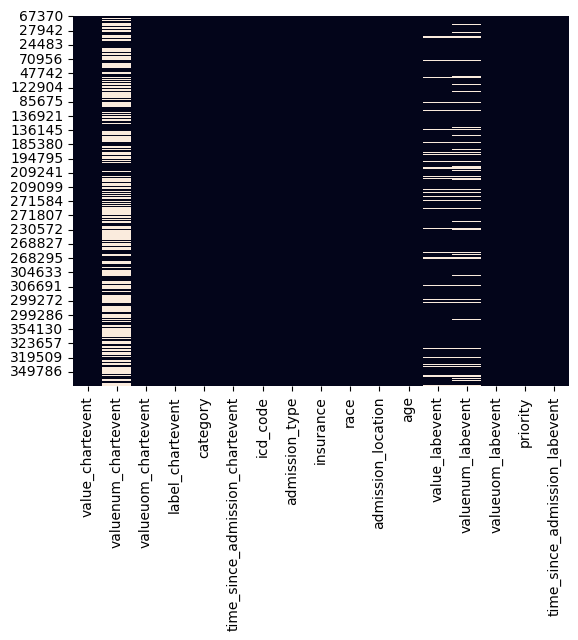

In [63]:
missing = df_sample.isnull().sum()
missing_percent = (missing / len(df_sample)) * 100
print(pd.DataFrame({"Missing": missing, "Percent (%)": missing_percent}))

sns.heatmap(df_sample.isnull(), cbar=False)

## Variable treatment

### valuenum_chartevent

In [64]:
# Tabela de contingência: frequência de missing por diagnóstico
df_sample['is_missing'] = df_sample['valuenum_chartevent'].isnull()
missing_by_icd = df_sample.groupby('icd_code')['is_missing'].agg(['mean', 'count'])
missing_by_icd.columns = ['taxa_missing', 'total_casos']
print(missing_by_icd.sort_values('taxa_missing', ascending=False).head(10))

          taxa_missing  total_casos
icd_code                           
4019          0.569516         6200
2724          0.569355         6200
Z87891        0.559677         6200
E785          0.548871         6200
E039          0.541774         6200
Z794          0.530161         6200


In [65]:
missing_by_priority = df_sample.groupby('priority')['is_missing'].agg(['mean', 'count'])
missing_by_priority.columns = ['taxa_missing', 'total_casos']
print(missing_by_priority.sort_values('taxa_missing', ascending=False))

          taxa_missing  total_casos
priority                           
STAT          0.559593        18274
ROUTINE       0.549471        10208
Unknown       0.544276         8718


In [68]:
missing_by_category = df_sample.groupby('category')['is_missing'].agg(['mean', 'count'])
missing_by_category.columns = ['taxa_missing', 'total_casos']
print(missing_by_category.sort_values('taxa_missing', ascending=False))

                             taxa_missing  total_casos
category                                              
Skin - Incisions                 1.000000          478
Cardiovascular                   1.000000          915
Cardiovascular (Pulses)          1.000000          873
GI/GU                            0.996058         1522
Care Plans                       0.979539         2297
Pulmonary                        0.949580         1190
Skin - Impairment                0.929155          367
Treatments                       0.894531         2304
Restraint/Support Systems        0.876336         4116
MD Progress Note                 0.784314           51
Pain/Sedation                    0.749516         2064
Access Lines - Invasive          0.532051          468
Neurological                     0.510524         2803
Cardiovascular (Pacer Data)      0.484848          165
General                          0.481818          220
Skin - Assessment                0.413963         1017
Access Lin

In [71]:

missing_by_category = df_sample.groupby('category')['is_missing'].mean().reset_index()
missing_by_category.columns = ['category', 'taxa_missing']
high_missing_categories = missing_by_category[missing_by_category['taxa_missing'] > 0.94]['category'].tolist()
df_ = df_sample[~df_sample['category'].isin(high_missing_categories)]
df_ = df_.drop(columns=['is_missing'])
print(f"Categorias removidas: {high_missing_categories}")
print(f"Shape original: {df_sample.shape} | Shape filtrado: {df_.shape}")

Categorias removidas: ['Cardiovascular', 'Cardiovascular (Pulses)', 'Care Plans', 'GI/GU', 'Pulmonary', 'Skin - Incisions']
Shape original: (37200, 18) | Shape filtrado: (29925, 17)


,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,insurance,race,admission_location,age,value_labevent,valuenum_labevent,valueuom_labevent,priority,time_since_admission_labevent
67370,Grade 0,NaN,Unknown,20 G Infiltration Scale,Access Lines - Peripheral,16.350000,2724,DIRECT EMER.,Other,WHITE,CLINIC REFERRAL,67,11.4,11.4,g/dL,STAT,15.783333
42599,Children,NaN,Unknown,Support Systems,Restraint/Support Systems,16.266667,2724,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,79,32.9,32.9,pg,ROUTINE,0.500000
62299,Unknown,NaN,Unknown,Restraint Location,Restraint/Support Systems,7.066667,2724,SURGICAL SAME DAY ADMISSION,Medicare,OTHER,PHYSICIAN REFERRAL,66,0,0.0,mEq/L,Unknown,4.000000
10137,24,24.0,insp/min,Respiratory Rate,Respiratory,7.033333,2724,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,79,136,136.0,mEq/L,STAT,8.750000
30998,Brisk,NaN,Unknown,Pupil Response Right,Neurological,21.550000,2724,URGENT,Other,WHITE,TRANSFER FROM HOSPITAL,56,110,110.0,IU/L,STAT,11.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317418,Oral,NaN,Unknown,Temperature Site,Routine Vital Signs,10.583333,Z87891,EW EMER.,Other,WHITE,EMERGENCY ROOM,70,178,178.0,mg/dL,STAT,3.850000
325284,11,11.0,mmHg,Central Venous Pressure,Hemodynamics,15.700000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,TRANSFER FROM HOSPITAL,58,INTUBATED.,NaN,Unknown,Unknown,5.616667
324418,98,98.0,mmHg,Non Invasive Blood Pressure systolic,Routine Vital Signs,22.550000,Z87891,URGENT,Medicare,UNKNOWN,TRANSFER FROM HOSPITAL,81,12.5,12.5,%,ROUTINE,18.600000
350939,1,1.0,Unknown,Visual / hearing deficit,Adm History/FHPA,0.466667,Z87891,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,89,7.2,7.2,mg/dL,ROUTINE,10.083333


                                 Missing  Percent (%)
value_chartevent                       0     0.000000
valuenum_chartevent                13418    44.838764
valueuom_chartevent                    0     0.000000
label_chartevent                       0     0.000000
category                               0     0.000000
time_since_admission_chartevent        0     0.000000
icd_code                               0     0.000000
admission_type                         0     0.000000
insurance                              0     0.000000
race                                   0     0.000000
admission_location                     0     0.000000
age                                    0     0.000000
value_labevent                      2367     7.909774
valuenum_labevent                   3870    12.932331
valueuom_labevent                      0     0.000000
priority                               0     0.000000
time_since_admission_labevent          2     0.006683


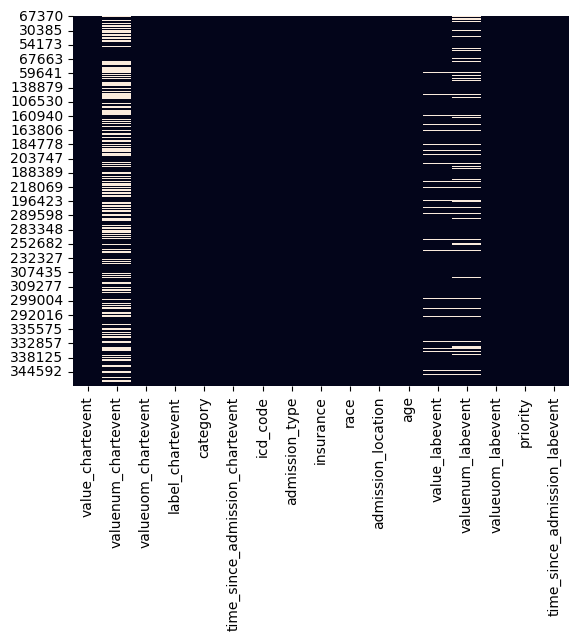

In [72]:

sns.heatmap(df_.isnull(), cbar=False)
display(df_)
missing = df_.isnull().sum()
missing_percent = (missing / len(df_)) * 100
print(pd.DataFrame({"Missing": missing, "Percent (%)": missing_percent}))

In [74]:
# create valuenum_missing column - 1 yes / 0 no
df_['valuenum_missing'] = df_['valuenum_chartevent'].isnull().astype(int)

In [76]:
# median if the group is bigger then 5

clinical_groups = ['icd_code', 'admission_type', 'priority']
df_['valuenum_chartevent'] = df_.groupby(clinical_groups)['valuenum_chartevent'].transform(
    lambda x: x.fillna(-999 if (x.isnull().all() or len(x) < 5) else x.median())
)

,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,insurance,race,admission_location,age,value_labevent,valuenum_labevent,valueuom_labevent,priority,time_since_admission_labevent,valuenum_missing
67370,Grade 0,12.7,Unknown,20 G Infiltration Scale,Access Lines - Peripheral,16.350000,2724,DIRECT EMER.,Other,WHITE,CLINIC REFERRAL,67,11.4,11.4,g/dL,STAT,15.783333,1
42599,Children,16.0,Unknown,Support Systems,Restraint/Support Systems,16.266667,2724,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,79,32.9,32.9,pg,ROUTINE,0.500000,1
62299,Unknown,15.0,Unknown,Restraint Location,Restraint/Support Systems,7.066667,2724,SURGICAL SAME DAY ADMISSION,Medicare,OTHER,PHYSICIAN REFERRAL,66,0,0.0,mEq/L,Unknown,4.000000,1
10137,24,24.0,insp/min,Respiratory Rate,Respiratory,7.033333,2724,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,79,136,136.0,mEq/L,STAT,8.750000,0
30998,Brisk,16.0,Unknown,Pupil Response Right,Neurological,21.550000,2724,URGENT,Other,WHITE,TRANSFER FROM HOSPITAL,56,110,110.0,IU/L,STAT,11.483333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317418,Oral,19.0,Unknown,Temperature Site,Routine Vital Signs,10.583333,Z87891,EW EMER.,Other,WHITE,EMERGENCY ROOM,70,178,178.0,mg/dL,STAT,3.850000,1
325284,11,11.0,mmHg,Central Venous Pressure,Hemodynamics,15.700000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,TRANSFER FROM HOSPITAL,58,INTUBATED.,NaN,Unknown,Unknown,5.616667,0
324418,98,98.0,mmHg,Non Invasive Blood Pressure systolic,Routine Vital Signs,22.550000,Z87891,URGENT,Medicare,UNKNOWN,TRANSFER FROM HOSPITAL,81,12.5,12.5,%,ROUTINE,18.600000,0
350939,1,1.0,Unknown,Visual / hearing deficit,Adm History/FHPA,0.466667,Z87891,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,89,7.2,7.2,mg/dL,ROUTINE,10.083333,0


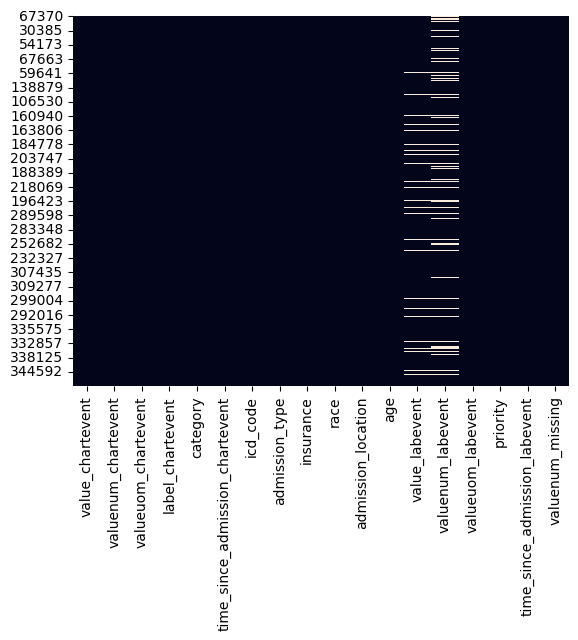

In [77]:
sns.heatmap(df_.isnull(), cbar=False)
display(df_)

### valuenum_labevent

In [78]:
missing = df_.isnull().sum()
missing_percent = (missing / len(df_)) * 100
print(pd.DataFrame({"Missing": missing, "Percent (%)": missing_percent}))

                                 Missing  Percent (%)
value_chartevent                       0     0.000000
valuenum_chartevent                    0     0.000000
valueuom_chartevent                    0     0.000000
label_chartevent                       0     0.000000
category                               0     0.000000
time_since_admission_chartevent        0     0.000000
icd_code                               0     0.000000
admission_type                         0     0.000000
insurance                              0     0.000000
race                                   0     0.000000
admission_location                     0     0.000000
age                                    0     0.000000
value_labevent                      2367     7.909774
valuenum_labevent                   3870    12.932331
valueuom_labevent                      0     0.000000
priority                               0     0.000000
time_since_admission_labevent          2     0.006683
valuenum_missing            

In [79]:
#KNN to complete the values
# INTUBATED. Yes = 1 and No = 0

numeric_cols = ['valuenum_labevent', 'age', 'valuenum_chartevent', 'time_since_admission_chartevent']

imputer = KNNImputer(n_neighbors=5)
df_[numeric_cols] = imputer.fit_transform(df_[numeric_cols])

display(df_)


,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,insurance,race,admission_location,age,value_labevent,valuenum_labevent,valueuom_labevent,priority,time_since_admission_labevent,valuenum_missing
67370,Grade 0,12.7,Unknown,20 G Infiltration Scale,Access Lines - Peripheral,16.350000,2724,DIRECT EMER.,Other,WHITE,CLINIC REFERRAL,67.0,11.4,11.40,g/dL,STAT,15.783333,1
42599,Children,16.0,Unknown,Support Systems,Restraint/Support Systems,16.266667,2724,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,79.0,32.9,32.90,pg,ROUTINE,0.500000,1
62299,Unknown,15.0,Unknown,Restraint Location,Restraint/Support Systems,7.066667,2724,SURGICAL SAME DAY ADMISSION,Medicare,OTHER,PHYSICIAN REFERRAL,66.0,0,0.00,mEq/L,Unknown,4.000000,1
10137,24,24.0,insp/min,Respiratory Rate,Respiratory,7.033333,2724,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,79.0,136,136.00,mEq/L,STAT,8.750000,0
30998,Brisk,16.0,Unknown,Pupil Response Right,Neurological,21.550000,2724,URGENT,Other,WHITE,TRANSFER FROM HOSPITAL,56.0,110,110.00,IU/L,STAT,11.483333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317418,Oral,19.0,Unknown,Temperature Site,Routine Vital Signs,10.583333,Z87891,EW EMER.,Other,WHITE,EMERGENCY ROOM,70.0,178,178.00,mg/dL,STAT,3.850000,1
325284,11,11.0,mmHg,Central Venous Pressure,Hemodynamics,15.700000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,TRANSFER FROM HOSPITAL,58.0,INTUBATED.,239.94,Unknown,Unknown,5.616667,0
324418,98,98.0,mmHg,Non Invasive Blood Pressure systolic,Routine Vital Signs,22.550000,Z87891,URGENT,Medicare,UNKNOWN,TRANSFER FROM HOSPITAL,81.0,12.5,12.50,%,ROUTINE,18.600000,0
350939,1,1.0,Unknown,Visual / hearing deficit,Adm History/FHPA,0.466667,Z87891,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,89.0,7.2,7.20,mg/dL,ROUTINE,10.083333,0


In [80]:

missing = df_.isnull().sum()
missing_percent = (missing / len(df_)) * 100
print(pd.DataFrame({"Missing": missing, "Percent (%)": missing_percent}))

                                 Missing  Percent (%)
value_chartevent                       0     0.000000
valuenum_chartevent                    0     0.000000
valueuom_chartevent                    0     0.000000
label_chartevent                       0     0.000000
category                               0     0.000000
time_since_admission_chartevent        0     0.000000
icd_code                               0     0.000000
admission_type                         0     0.000000
insurance                              0     0.000000
race                                   0     0.000000
admission_location                     0     0.000000
age                                    0     0.000000
value_labevent                      2367     7.909774
valuenum_labevent                      0     0.000000
valueuom_labevent                      0     0.000000
priority                               0     0.000000
time_since_admission_labevent          2     0.006683
valuenum_missing            

### value_labevent

In [81]:
# Substitui os NaNs de 'value_labevent' pelos valores de 'valuenum_labevent'

df_['value_labevent'] = df_['value_labevent'].fillna(df_['valuenum_labevent'])

missing = df_.isnull().sum()
missing_percent = (missing / len(df_)) * 100
print(pd.DataFrame({"Missing": missing, "Percent (%)": missing_percent}))

display(df_)

                                 Missing  Percent (%)
value_chartevent                       0     0.000000
valuenum_chartevent                    0     0.000000
valueuom_chartevent                    0     0.000000
label_chartevent                       0     0.000000
category                               0     0.000000
time_since_admission_chartevent        0     0.000000
icd_code                               0     0.000000
admission_type                         0     0.000000
insurance                              0     0.000000
race                                   0     0.000000
admission_location                     0     0.000000
age                                    0     0.000000
value_labevent                         0     0.000000
valuenum_labevent                      0     0.000000
valueuom_labevent                      0     0.000000
priority                               0     0.000000
time_since_admission_labevent          2     0.006683
valuenum_missing            

,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,insurance,race,admission_location,age,value_labevent,valuenum_labevent,valueuom_labevent,priority,time_since_admission_labevent,valuenum_missing
67370,Grade 0,12.7,Unknown,20 G Infiltration Scale,Access Lines - Peripheral,16.350000,2724,DIRECT EMER.,Other,WHITE,CLINIC REFERRAL,67.0,11.4,11.40,g/dL,STAT,15.783333,1
42599,Children,16.0,Unknown,Support Systems,Restraint/Support Systems,16.266667,2724,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,79.0,32.9,32.90,pg,ROUTINE,0.500000,1
62299,Unknown,15.0,Unknown,Restraint Location,Restraint/Support Systems,7.066667,2724,SURGICAL SAME DAY ADMISSION,Medicare,OTHER,PHYSICIAN REFERRAL,66.0,0,0.00,mEq/L,Unknown,4.000000,1
10137,24,24.0,insp/min,Respiratory Rate,Respiratory,7.033333,2724,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,79.0,136,136.00,mEq/L,STAT,8.750000,0
30998,Brisk,16.0,Unknown,Pupil Response Right,Neurological,21.550000,2724,URGENT,Other,WHITE,TRANSFER FROM HOSPITAL,56.0,110,110.00,IU/L,STAT,11.483333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317418,Oral,19.0,Unknown,Temperature Site,Routine Vital Signs,10.583333,Z87891,EW EMER.,Other,WHITE,EMERGENCY ROOM,70.0,178,178.00,mg/dL,STAT,3.850000,1
325284,11,11.0,mmHg,Central Venous Pressure,Hemodynamics,15.700000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,TRANSFER FROM HOSPITAL,58.0,INTUBATED.,239.94,Unknown,Unknown,5.616667,0
324418,98,98.0,mmHg,Non Invasive Blood Pressure systolic,Routine Vital Signs,22.550000,Z87891,URGENT,Medicare,UNKNOWN,TRANSFER FROM HOSPITAL,81.0,12.5,12.50,%,ROUTINE,18.600000,0
350939,1,1.0,Unknown,Visual / hearing deficit,Adm History/FHPA,0.466667,Z87891,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,89.0,7.2,7.20,mg/dL,ROUTINE,10.083333,0


### time_since_admission_labevent

In [82]:
df_ = df_.dropna(subset=['time_since_admission_labevent'])

missing = df_.isnull().sum()
missing_percent = (missing / len(df_)) * 100
print(pd.DataFrame({"Missing": missing, "Percent (%)": missing_percent}))

display(df_)

                                 Missing  Percent (%)
value_chartevent                       0          0.0
valuenum_chartevent                    0          0.0
valueuom_chartevent                    0          0.0
label_chartevent                       0          0.0
category                               0          0.0
time_since_admission_chartevent        0          0.0
icd_code                               0          0.0
admission_type                         0          0.0
insurance                              0          0.0
race                                   0          0.0
admission_location                     0          0.0
age                                    0          0.0
value_labevent                         0          0.0
valuenum_labevent                      0          0.0
valueuom_labevent                      0          0.0
priority                               0          0.0
time_since_admission_labevent          0          0.0
valuenum_missing            

,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,insurance,race,admission_location,age,value_labevent,valuenum_labevent,valueuom_labevent,priority,time_since_admission_labevent,valuenum_missing
67370,Grade 0,12.7,Unknown,20 G Infiltration Scale,Access Lines - Peripheral,16.350000,2724,DIRECT EMER.,Other,WHITE,CLINIC REFERRAL,67.0,11.4,11.40,g/dL,STAT,15.783333,1
42599,Children,16.0,Unknown,Support Systems,Restraint/Support Systems,16.266667,2724,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,79.0,32.9,32.90,pg,ROUTINE,0.500000,1
62299,Unknown,15.0,Unknown,Restraint Location,Restraint/Support Systems,7.066667,2724,SURGICAL SAME DAY ADMISSION,Medicare,OTHER,PHYSICIAN REFERRAL,66.0,0,0.00,mEq/L,Unknown,4.000000,1
10137,24,24.0,insp/min,Respiratory Rate,Respiratory,7.033333,2724,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,79.0,136,136.00,mEq/L,STAT,8.750000,0
30998,Brisk,16.0,Unknown,Pupil Response Right,Neurological,21.550000,2724,URGENT,Other,WHITE,TRANSFER FROM HOSPITAL,56.0,110,110.00,IU/L,STAT,11.483333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317418,Oral,19.0,Unknown,Temperature Site,Routine Vital Signs,10.583333,Z87891,EW EMER.,Other,WHITE,EMERGENCY ROOM,70.0,178,178.00,mg/dL,STAT,3.850000,1
325284,11,11.0,mmHg,Central Venous Pressure,Hemodynamics,15.700000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,TRANSFER FROM HOSPITAL,58.0,INTUBATED.,239.94,Unknown,Unknown,5.616667,0
324418,98,98.0,mmHg,Non Invasive Blood Pressure systolic,Routine Vital Signs,22.550000,Z87891,URGENT,Medicare,UNKNOWN,TRANSFER FROM HOSPITAL,81.0,12.5,12.50,%,ROUTINE,18.600000,0
350939,1,1.0,Unknown,Visual / hearing deficit,Adm History/FHPA,0.466667,Z87891,EW EMER.,Medicare,WHITE,EMERGENCY ROOM,89.0,7.2,7.20,mg/dL,ROUTINE,10.083333,0


In [83]:
df_sample = df_

# Other treetment - 0 Nans


In [5]:
df_sample = pd.read_csv('..\models\df_balanced_full.csv', low_memory=False)
display(df_sample)

,subject_id,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,insurance,race,admission_location,age,value_labevent,valuenum_labevent,valueuom_labevent,priority,time_since_admission_labevent
0,10014078,103,103.0,°F,Temperature Fahrenheit,Routine Vital Signs,4.850000,2724,EW EMER.,Medicaid,UNABLE TO OBTAIN,EMERGENCY ROOM,60,-3,-3.0,mEq/L,Unknown,12.316667
1,10011398,25,25.0,mEq/L,TCO2 (calc) Arterial,Labs,7.900000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,1.4,1.4,Unknown,STAT,4.150000
2,10011398,25,25.0,mA,Temporary Ventricular Stim Setting mA,Cardiovascular (Pacer Data),16.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,384,384.0,mm Hg,Unknown,5.616667
3,10011398,36.8,36.8,°C,Temperature Celsius,Routine Vital Signs,18.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,98,98.0,%,Unknown,6.666667
4,10023771,100,100.0,%,O2 saturation pulseoxymetry,Respiratory,22.750000,2724,ELECTIVE,Medicare,WHITE,PHYSICIAN REFERRAL,70,1.2,1.2,Unknown,ROUTINE,15.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,10023117,104,104.0,mg/dL,Glucose (serum),Labs,9.050000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,EMERGENCY ROOM,58,2,2.0,Unknown,STAT,2.666667
49250,10019003,Obeys Commands,6.0,Unknown,GCS - Motor Response,Neurological,1.600000,Z87891,EW EMER.,Other,WHITE,TRANSFER FROM HOSPITAL,72,1.1,1.1,mg/dL,STAT,6.000000
49251,10023117,No response,1.0,Unknown,GCS - Motor Response,Neurological,4.950000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,TRANSFER FROM HOSPITAL,58,___,133.0,mEq/L,STAT,2.566667
49252,10037861,No movement,0.0,Unknown,Strength L Arm,Neurological,23.433333,Z87891,EW EMER.,Medicare,UNKNOWN,EMERGENCY ROOM,79,21,21.0,mg/dL,STAT,9.183333


In [6]:

variables = [
   'value_chartevent', 'label_chartevent', 'valueuom_labevent', 'valueuom_chartevent'
]

lab = ['value_labevent']

variables_cat = ['admission_type', 'insurance', 'priority', 'race', 'admission_location', 'category']

numerical_cols = [
    'valuenum_chartevent', 'valuenum_labevent',
    'time_since_admission_chartevent', 'time_since_admission_labevent', 'age'
]
target = 'icd_code'

X_raw = df_sample[variables + numerical_cols + variables_cat + lab].copy()
y = df_sample[target].copy()



In [7]:

le = LabelEncoder()
y_encoded = le.fit_transform(y)

y = y_encoded

In [8]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot_encoded = encoder.fit_transform(X_raw[variables_cat])

one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(variables_cat),
                          index=X_raw.index)

X_encoded = pd.concat([X_raw.drop(columns=variables_cat), one_hot_df], axis=1)

display(X_encoded)

,value_chartevent,label_chartevent,valueuom_labevent,valueuom_chartevent,valuenum_chartevent,valuenum_labevent,time_since_admission_chartevent,time_since_admission_labevent,age,value_labevent,...,category_Neurological,category_Pain/Sedation,category_Pulmonary,category_Respiratory,category_Restraint/Support Systems,category_Routine Vital Signs,category_Skin - Assessment,category_Skin - Impairment,category_Toxicology,category_Treatments
0,103,Temperature Fahrenheit,mEq/L,°F,103.0,-3.0,4.850000,12.316667,60,-3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,25,TCO2 (calc) Arterial,Unknown,mEq/L,25.0,1.4,7.900000,4.150000,67,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,Temporary Ventricular Stim Setting mA,mm Hg,mA,25.0,384.0,16.750000,5.616667,67,384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36.8,Temperature Celsius,%,°C,36.8,98.0,18.750000,6.666667,67,98,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,100,O2 saturation pulseoxymetry,Unknown,%,100.0,1.2,22.750000,15.366667,70,1.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,104,Glucose (serum),Unknown,mg/dL,104.0,2.0,9.050000,2.666667,58,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49250,Obeys Commands,GCS - Motor Response,mg/dL,Unknown,6.0,1.1,1.600000,6.000000,72,1.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49251,No response,GCS - Motor Response,mEq/L,Unknown,1.0,133.0,4.950000,2.566667,58,___,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49252,No movement,Strength L Arm,mg/dL,Unknown,0.0,21.0,23.433333,9.183333,79,21,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
for col in variables:
    freq = X_encoded[col].value_counts()
    X_encoded[col + '_freq'] = X_encoded[col].map(freq)

X_encoded.drop(columns=variables, inplace=True)

for col in numerical_cols:
    X_encoded[col + '_missing'] = X_encoded[col].isna().astype(int)

X_encoded[numerical_cols] = X_encoded[numerical_cols].fillna(-999)

display(X_encoded)



,valuenum_chartevent,valuenum_labevent,time_since_admission_chartevent,time_since_admission_labevent,age,value_labevent,admission_type_DIRECT EMER.,admission_type_ELECTIVE,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,...,category_Treatments,value_chartevent_freq,label_chartevent_freq,valueuom_labevent_freq,valueuom_chartevent_freq,valuenum_chartevent_missing,valuenum_labevent_missing,time_since_admission_chartevent_missing,time_since_admission_labevent_missing,age_missing
0,103.0,-3.0,4.850000,12.316667,60,-3,0.0,0.0,1.0,0.0,...,0.0,163,623,10605,623,0,0,0,0,0
1,25.0,1.4,7.900000,4.150000,67,1.4,0.0,0.0,0.0,0.0,...,0.0,191,157,2878,2053,0,0,0,0,0
2,25.0,384.0,16.750000,5.616667,67,384,0.0,0.0,0.0,0.0,...,0.0,191,8,2726,71,0,0,0,0,0
3,36.8,98.0,18.750000,6.666667,67,98,0.0,0.0,0.0,0.0,...,0.0,25,162,5471,281,0,0,0,0,0
4,100.0,1.2,22.750000,15.366667,70,1.2,0.0,1.0,0.0,0.0,...,0.0,1201,2447,2878,3993,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,104.0,2.0,9.050000,2.666667,58,2,0.0,0.0,0.0,1.0,...,0.0,111,253,2878,1769,0,0,0,0,0
49250,6.0,1.1,1.600000,6.000000,72,1.1,0.0,0.0,1.0,0.0,...,0.0,401,510,9394,17903,0,0,0,0,0
49251,1.0,133.0,4.950000,2.566667,58,___,0.0,0.0,0.0,1.0,...,0.0,59,510,10605,17903,0,0,0,0,0
49252,0.0,21.0,23.433333,9.183333,79,21,0.0,0.0,1.0,0.0,...,0.0,49,351,9394,17903,0,0,0,0,0


In [10]:
X_encoded['value_labevent'] = X_encoded['value_labevent'].astype(str)

freq = X_encoded['value_labevent'].value_counts()
X_encoded['value_labevent_freq'] = X_encoded['value_labevent'].map(freq)

X_encoded.drop(columns=['value_labevent'], inplace=True)

display(X_encoded)

X_encoded.to_csv("df_treated2.csv", index=False)

,valuenum_chartevent,valuenum_labevent,time_since_admission_chartevent,time_since_admission_labevent,age,admission_type_DIRECT EMER.,admission_type_ELECTIVE,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,...,value_chartevent_freq,label_chartevent_freq,valueuom_labevent_freq,valueuom_chartevent_freq,valuenum_chartevent_missing,valuenum_labevent_missing,time_since_admission_chartevent_missing,time_since_admission_labevent_missing,age_missing,value_labevent_freq
0,103.0,-3.0,4.850000,12.316667,60,0.0,0.0,1.0,0.0,0.0,...,163,623,10605,623,0,0,0,0,0,17
1,25.0,1.4,7.900000,4.150000,67,0.0,0.0,0.0,0.0,1.0,...,191,157,2878,2053,0,0,0,0,0,241
2,25.0,384.0,16.750000,5.616667,67,0.0,0.0,0.0,0.0,1.0,...,191,8,2726,71,0,0,0,0,0,12
3,36.8,98.0,18.750000,6.666667,67,0.0,0.0,0.0,0.0,1.0,...,25,162,5471,281,0,0,0,0,0,170
4,100.0,1.2,22.750000,15.366667,70,0.0,1.0,0.0,0.0,0.0,...,1201,2447,2878,3993,0,0,0,0,0,266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,104.0,2.0,9.050000,2.666667,58,0.0,0.0,0.0,1.0,0.0,...,111,253,2878,1769,0,0,0,0,0,277
49250,6.0,1.1,1.600000,6.000000,72,0.0,0.0,1.0,0.0,0.0,...,401,510,9394,17903,0,0,0,0,0,271
49251,1.0,133.0,4.950000,2.566667,58,0.0,0.0,0.0,1.0,0.0,...,59,510,10605,17903,0,0,0,0,0,4762
49252,0.0,21.0,23.433333,9.183333,79,0.0,0.0,1.0,0.0,0.0,...,49,351,9394,17903,0,0,0,0,0,238


## Model

In [9]:

X = X_encoded 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# com balanço
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6251142016038981


In [12]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1678
           1       0.71      0.65      0.68      1582
           2       0.59      0.59      0.59      1595
           3       0.51      0.34      0.40      1735
           4       0.71      0.90      0.80      1618
           5       0.50      0.54      0.52      1643

    accuracy                           0.63      9851
   macro avg       0.62      0.63      0.62      9851
weighted avg       0.62      0.63      0.62      9851



In [13]:
features = pd.DataFrame(rf.feature_importances_, index= X.columns)

features.head(15)

,0
valuenum_chartevent,0.051679
valuenum_labevent,0.065718
time_since_admission_chartevent,0.070168
time_since_admission_labevent,0.066165
age,0.156704
admission_type_DIRECT EMER.,0.006424
admission_type_ELECTIVE,0.008396
admission_type_EW EMER.,0.026293
admission_type_OBSERVATION ADMIT,0.023384
admission_type_SURGICAL SAME DAY ADMISSION,0.008681


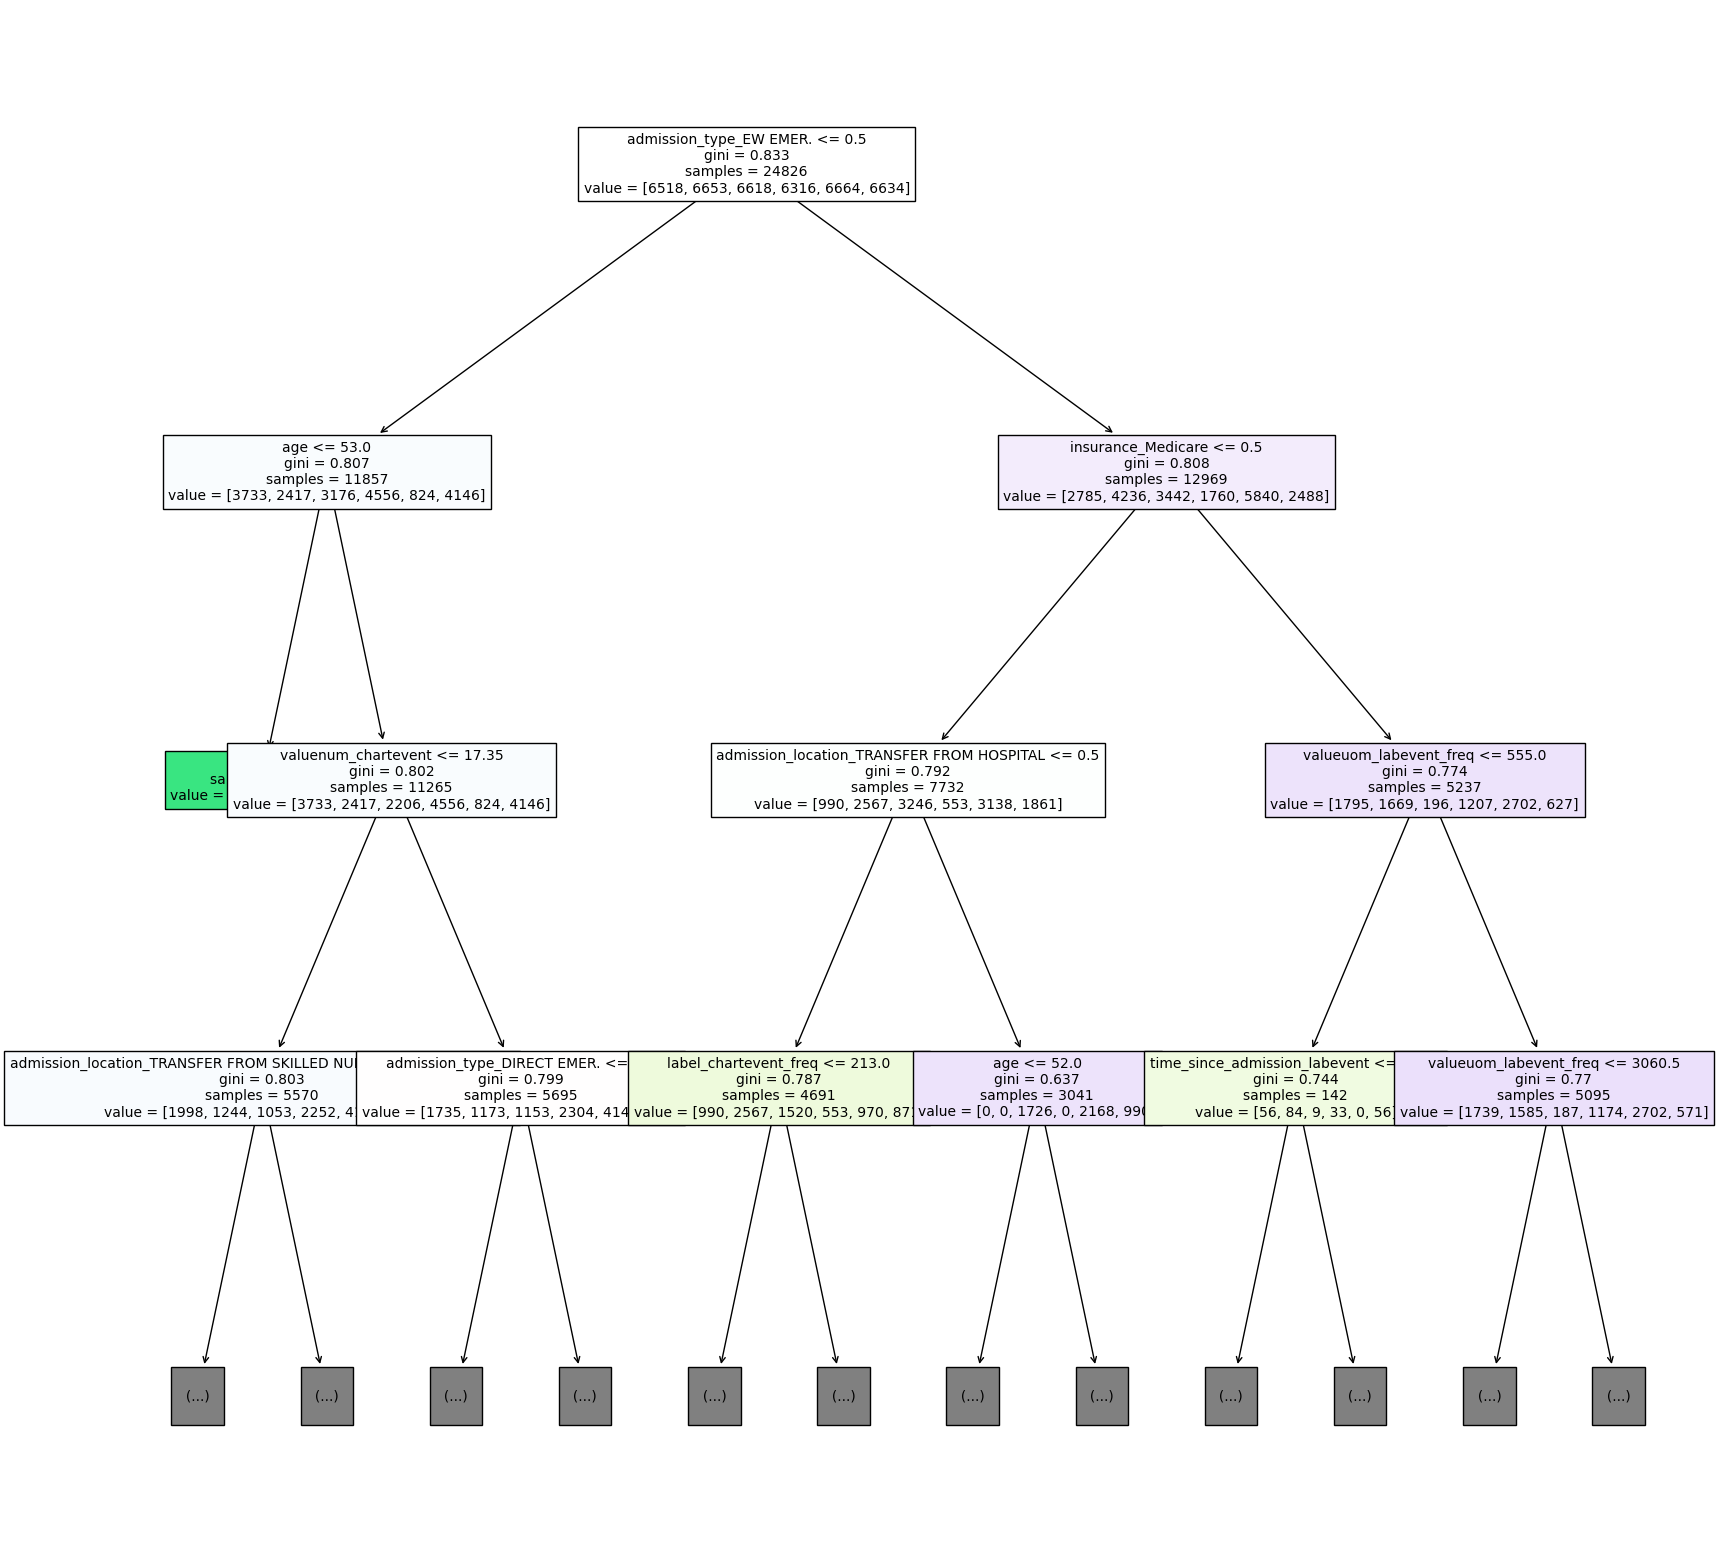

In [14]:

plt.figure(figsize=(20,20))
plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True, max_depth=3, fontsize=10)
plt.show()

## N_estimator and max_depth

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20),
              'min_samples_split': [2, 5, 10],
              'max_features': ['sqrt', 'log2']}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A787B08BD0>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A787B08090>})

In [16]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 490}


In [17]:
#hyper parameters - Automatizar isto

rf2 = RandomForestClassifier( n_estimators= 490, criterion= 'entropy',
min_samples_split = 10,
max_depth = 10,
max_features= 'sqrt',
random_state= 42

)

In [18]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       n_estimators=490, random_state=42)

In [19]:
rf2.score(X_test, y_test)

0.6301898284438128

In [20]:
y_pred2 = rf2.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73      1678
           1       0.56      0.61      0.59      1582
           2       0.67      0.54      0.60      1595
           3       0.94      0.14      0.24      1735
           4       0.71      0.99      0.83      1618
           5       0.51      0.74      0.60      1643

    accuracy                           0.63      9851
   macro avg       0.68      0.63      0.60      9851
weighted avg       0.68      0.63      0.59      9851



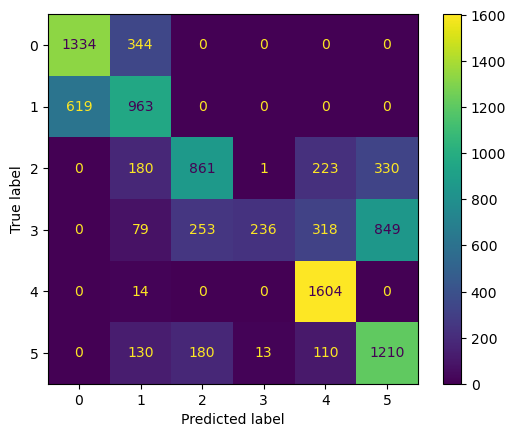

In [22]:

cm = confusion_matrix(y_test, y_pred2)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Feature Engeneering

## Best Features

Sitck with the best features from the last model

### Best 20 features out of 68

In [23]:
importances = rf2.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Order by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# top 20 features
top_features = feature_importance_df['Feature'][:20].values
print(top_features)

# Reduze dataset
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


                                      Feature  Importance
4                                         age    0.264149
31  admission_location_TRANSFER FROM HOSPITAL    0.075717
7                     admission_type_EW EMER.    0.059627
8            admission_type_OBSERVATION ADMIT    0.057299
13                            insurance_Other    0.054269
..                                        ...         ...
59                valuenum_chartevent_missing    0.000000
60                  valuenum_labevent_missing    0.000000
61    time_since_admission_chartevent_missing    0.000000
62      time_since_admission_labevent_missing    0.000000
63                                age_missing    0.000000

[65 rows x 2 columns]
['age' 'admission_location_TRANSFER FROM HOSPITAL'
 'admission_type_EW EMER.' 'admission_type_OBSERVATION ADMIT'
 'insurance_Other' 'race_WHITE' 'insurance_Medicare'
 'admission_location_EMERGENCY ROOM' 'race_BLACK/AFRICAN AMERICAN'
 'time_since_admission_labevent' 'admission_loca

In [24]:


param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20),
              'min_samples_split': [2, 5, 10],
            'max_features': ['sqrt', 'log2']}

rf2 = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A787CC5CD0>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A787C1C490>})

In [25]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 17, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 346}


In [26]:
rf3 = RandomForestClassifier( n_estimators= 346, criterion= 'entropy',
min_samples_split = 10,
max_depth = 17,
max_features= 'sqrt',
random_state= 42,
)

In [27]:
rf3.fit(X_train_selected, y_train)


RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_split=10,
                       n_estimators=346, random_state=42)

In [28]:
# piorou
rf3.score(X_test_selected, y_test)

0.63749873109329

In [29]:
y_pred2 = rf3.predict(X_test_selected)

In [30]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      1678
           1       0.74      0.63      0.68      1582
           2       0.60      0.56      0.58      1595
           3       0.53      0.31      0.39      1735
           4       0.71      0.96      0.82      1618
           5       0.50      0.58      0.54      1643

    accuracy                           0.64      9851
   macro avg       0.63      0.64      0.63      9851
weighted avg       0.63      0.64      0.62      9851



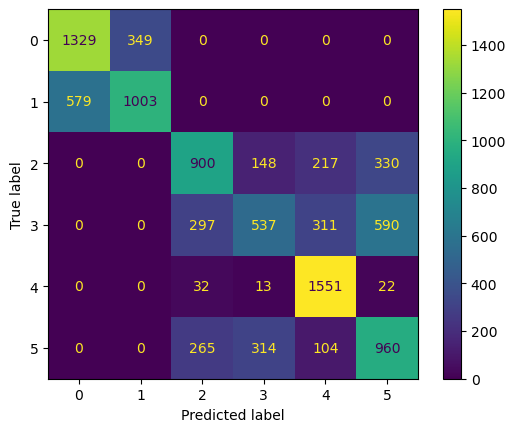

In [31]:
cm = confusion_matrix(y_test, y_pred2)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()